### Computational Guided Inquiry for PChem (Neshyba, 2022)

## Analytical $\mu$

### Introduction
Here we're going to develop a method for finding analytical formulas for $\mu_T$ (the *isothermal Joule-Thomson coefficient*) of a non-ideal gas. To do that, we'll leverage what we know about $\pi _T$ (the *internal pressure*), so the main work is figuring out how to find $\mu _T$ from $\pi _T$. On the way, we'll be introducing the "magic wand" (I just made that up) of Thermodynamics, namely, a set of equations called *Maxwell's Equations*.

### Getting $\pi _T$ from $P(T,V)$
We'll begin with the definition of $\pi _T$,

$$
\pi _T \equiv \big ( \frac {\partial U}{\partial V} \big )_T \ \ \ (1)
$$

If we had $U(T,V)$ for our non-ideal gas in algebraic form, we'd take the above derivative and be done! The problem is, we don't always have that. What we *do* typically have is $P(T,V)$. So our next task is to figure out how to use that knowledge in combination with Eq. (1). 

To do that, it turns out that a set of equations called *Maxwell's equations* is very handy. The figure below shows a mnemonic for these equations.

<p style='text-align: center;'>
<img src="http://webspace.pugetsound.edu/facultypages/nesh/Notebook/TheBox.png" height="500" width="500"/>
<strong>Figure 1</strong>. Mnemonic for Maxwell's Equations: The Box.
</p>

According to Maxwell (and this figure), the differential equation of state for the internal energy is $dU = TdS-PdV$. If we divide by $dV$ while holding the temperature constant, and then apply a Maxwell relation to get rid of the entropy-containing term (also from The Box!), we get to  

$$
\pi _T = T\big ( \frac {\partial P}{\partial T} \big )_V - P \ \ \ (2)
$$

The great thing about Eq. (2) is, if you have an expression for $P(T,V)$, then with a little calculus you can arrive at an analytical expression for $\pi_T$ as a function of temperature and volume. For example, the pressure of a van der Waals gas is given by 

$$
P_{vdw} = \frac {nRT}{V-nb} - \frac{n^2a}{V^2} \ \ \ (3)
$$

Substituting $P_{vdw}$ for $P$ in Eq. (2) leads to 

$$
\pi_T = \frac{n^2a}{V^2} \ \ \ (4)
$$ 

As another example, the pressure of a Berthelot gas is given by 

$$
P_{Berthelot} = \frac {nRT}{V-nb} - \frac{n^2a}{TV^2} \ \ \ (5)
$$

To get $\pi_T$ for this type of gas, you'd substitue $P_{Berthelot}$ into Eq. (2).

### Getting $\mu _T$
Getting $\mu _T$ is a little more challenging, but the same basic ideas apply. We'll begin with the definition of $\mu _T$,

$$
\mu _T \equiv \big ( \frac {\partial H}{\partial P} \big )_T \ \ \ (6)
$$

This time, we'll use the differential equation of state for the *enthalpy*, $dH = TdS+VdP$ (from The Box), divide by $dP$ while holding the temperature constant, and apply a Maxwell relation to get rid of the entropy-containing term (also from The Box). Now we get 

$$
\mu _T = -T \big ( \frac {\partial V}{\partial T} \big )_P + V \ \ \ (7)
$$

But now we have a new problem: to take the partial derivative indicated here, we'd need an algebraic expression of the volume of our gas as a function of its temperature and pressure, i.e., $V(T,P)$. But we are usually not given that. Instead, we usually have $P(T,V)$, which is not always invertible to yield $V(T,P)$. What to do?

Our answer is an Euler Chain Relation for $\big ( \frac {\partial V}{\partial T} \big )_P$, namely

$$
\big ( \frac {\partial V}{\partial T} \big )_P = -\frac {\big ( \frac {\partial P}{\partial T} \big )_V} {\big ( \frac {\partial P}{\partial V} \big )_T}  \ \ \ (8)
$$

If you insert Eq. (8) into (7), and take advantage of (2), you get to the general relationship

$$
\mu _T = \frac {P + \pi_T} {\big ( \frac {\partial P}{\partial V} \big )_T} + V \ \ \ (9)
$$

To use this equation, you'd follow the same pattern as you did with $\pi_T$, namely substitute $P_{vdw}$ or $P_{Berthelot}$ for $P$ in Eq. (9), take the derivative, and you'll have $\mu _T$.

### Linearizing
It turns out that it can be pretty convenient later on if expressions for $\pi_T$ and $\mu_T$ are linear in $a$ and $b$. Our method outlined above, leading to Eq. (4), did that automatically: $\pi_T$ for a van der Waals gas *is* first-order in $a$. In other cases (as you'll see), the method gives you more complex expressions -- not linear in $a$ and $b$. We still have options, however, in that we can attempt to *linearize* our expressions by taking Taylor expansions in $a$ and/or $b$. The assumption built into this approach is that the changes caused by $a$ and $b$, which convert an ideal gas into a van der Waals or Berthelot gas, are in some sense small.

Let's see how this would work in the case of $\mu_T$. For notational convenience, we'll define the first term in Eq. (9) as a function $F$, 

$$
F(a,b) \equiv \frac {P + \pi_T} {\big ( \frac {\partial P}{\partial V} \big )_T} \ \ \ (10)
$$ 

so we have $\mu _T = F(a,b) + V$. Now we construct a *bilinear Taylor approximation* to $F$,

$$
F(a,b) \approx F_{a,b=0} + a\big (\frac{\partial F}{\partial a}\big )|_{a,b=0}  + b\big (\frac{\partial F}{\partial b}\big )|_{a,b=0} \ \ \ (11)
$$

so that 

$$
\mu _T \approx F_{a,b=0} + a\big (\frac{\partial F}{\partial a}\big )|_{a,b=0}  + b\big (\frac{\partial F}{\partial b}\big )|_{a,b=0} + V \ \ \ (12)
$$



### Learning Goals

1. I can use The Box to obtain Maxwell's equations.
1. I can find algebraic expressions for $\pi _T$ and $\mu _T$ from $P(T,V)$ for a given non-ideal gas model (e.g., van der Waals, Berthelot).
1. I can simplify such expressions using a bilinear expansion in terms of variables that express non-ideality, like $a$ and $b$ of van der Waals or Berthelot.

In [1]:
import sympy as sp

### Derivation of $\pi _T$ for a van der Waals gas
In the cell below, we derive an analytical expression for $\pi _T$ for a van der Waals gas, with the help of Sympy. 

In [2]:
# Lay out some symbolic variables
sp.var("a")
sp.var("b")
sp.var("n")
sp.var("V")
sp.var("R")
sp.var("T")

# Express P(T,V) for a van der Waals gas (Eq. (3))
P_vdw = n*R*T/(V-n*b) - a*n**2/V**2

# Use Sympy, with Eq. (2), to construct pi_T, and print it in "pretty" format
dPdT = sp.diff(P_vdw,T)
pi_T = T*dPdT - P_vdw
sp.pprint(pi_T)

   2
a⋅n 
────
  2 
 V  


### Derivation of $\mu _T$ for a van der Waals gas
Your next task is to use Eq. (9) to derive an analytical expression for $\mu _T$ for a van der Waals gas.  

In [3]:
# Use Sympy, with Eq. (9), to construct mu_T, and print it in "pretty" format
### BEGIN SOLUTION
pi_T = n**2*a/V**2
dPdV = sp.diff(P_vdw,V)
mu_T = (P_vdw+pi_T)/dPdV+V
print('mu_T =')
sp.pprint(mu_T)
### END SOLUTION

mu_T =
              R⋅T⋅n                  
───────────────────────────────── + V
          ⎛                    2⎞    
          ⎜    R⋅T⋅n      2⋅a⋅n ⎟    
(V - b⋅n)⋅⎜- ────────── + ──────⎟    
          ⎜           2      3  ⎟    
          ⎝  (V - b⋅n)      V   ⎠    


### $\mu _T$ as a bilinear function of van der Waals $a$ and $b$ 
Now, we're going to linearize the result you just got for $\mu$. To do that, we 

1. Construct $F$ as shown in Eq. (10). Since we'll need it eventually, we also find $F_0$ by substituting $a=0$ and $b=0$.
1. Construct $\big (\frac{\partial F}{\partial a}\big )|_{a,b=0}$ by taking the derivative of $F$ with respect to $a$, and then substituting $a=0$ and $b=0$.
1. Construct $\big (\frac{\partial F}{\partial b}\big )|_{a,b=0}$ using a similar approach as step 2.
1. Construct $\mu_T$ using Eq. (12). 

then take derivatives, and then substitute $\big (\frac{\partial F}{\partial a}\big )|_{a,b=0}$, first taking the derivative of $F$ with respect to $a$, and *then* substituting zeros for $a$ and $b$. Similarly with $\big (\frac{\partial F}{\partial b}\big )|_{a,b=0}$. Sympy can help. Hopefully,  you'll get something like $\mu_T = n \times (b - \frac{2a}{RT})$. 

F0= -V
Fa= -2*n/(R*T)
Fb= n
mu_T (bilinear approximation) =
      2⋅a⋅n
b⋅n - ─────
       R⋅T 
b*n - 2*a*n/(R*T)
24.436/((20 - b)*(a/4000 - 24.436/(20 - b)**2))


<IPython.core.display.Javascript object>


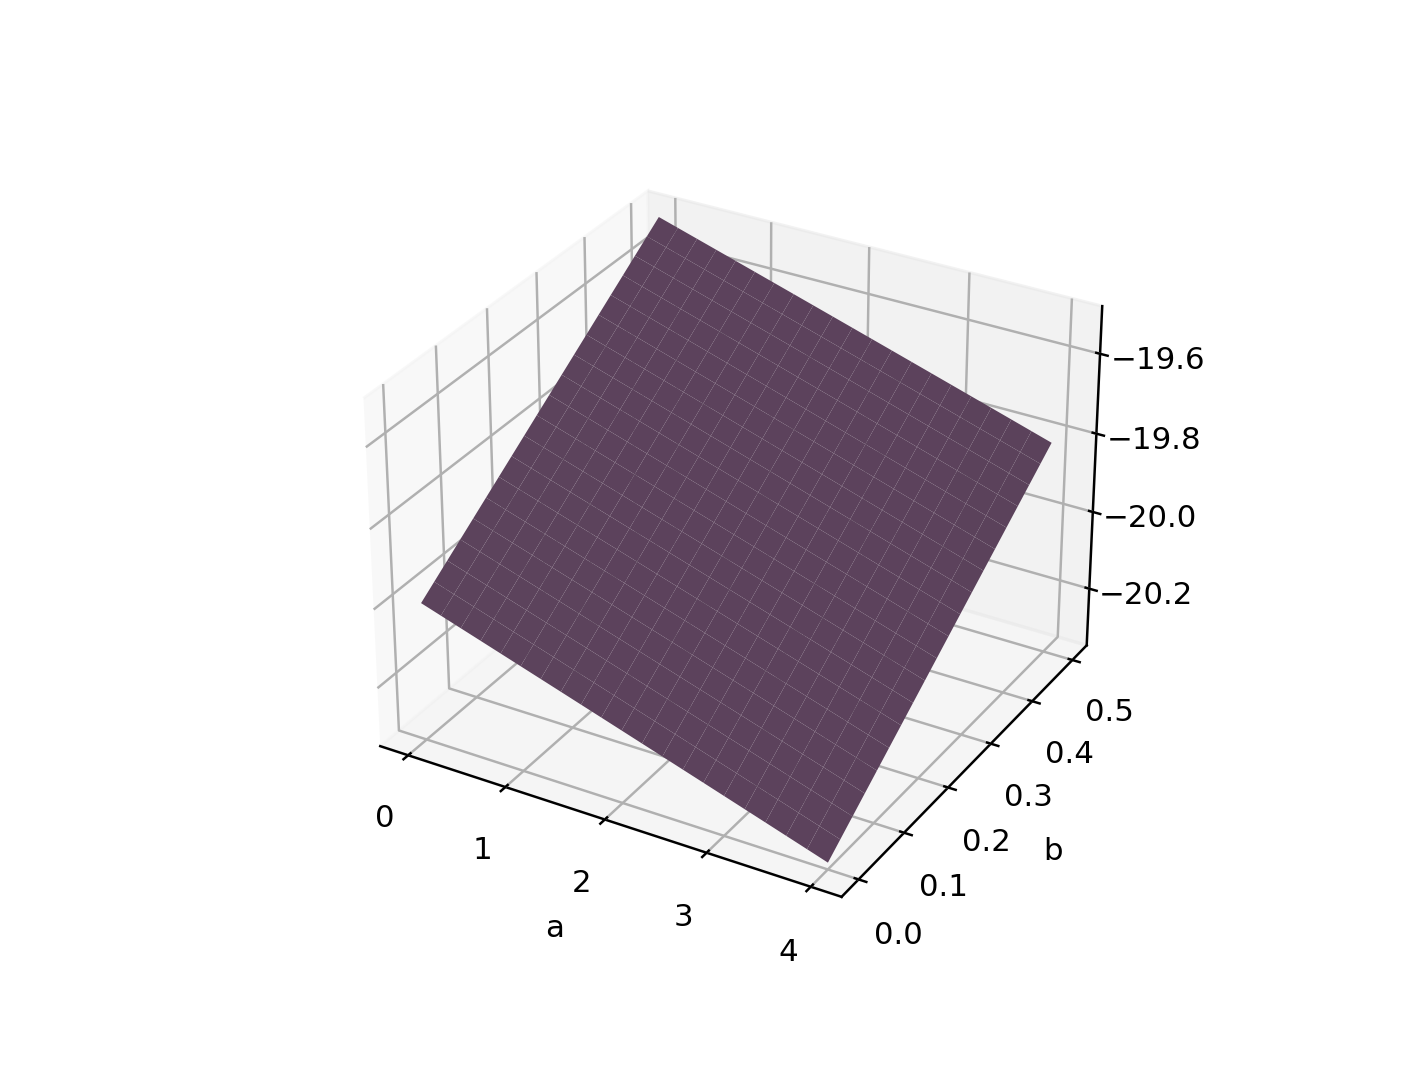

Text(0.5, 0.5, 'b')

In [4]:
# Here's F and F0 
F = (P_vdw+pi_T)/dPdV
F0 = F.subs({a:0,b:0})
print("F0=",F0)

# Here we get Fa by taking the derivative, then substituting a=0 and b=0
dFda = sp.diff(F,a)
Fa = dFda.subs({a:0,b:0})
print("Fa=",Fa)

# Get Fb similarly
### BEGIN SOLUTION
dFdb = sp.diff(F,b)
Fb = dFdb.subs({a:0,b:0})
print("Fb=",Fb)
### END SOLUTION

# Put them all together (Eq. 12)
print('mu_T (bilinear approximation) =')
### BEGIN SOLUTION
mu_T = F0 + Fa*a + Fb*b + V
sp.pprint(mu_T)
print(mu_T)

# This is not part of the solution, but motivation for the bilinear approach
import PchemLibrary as PL
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

agrid, bgrid = PL.Statespace([0,4,21],[0,.5,20])
Ftrial = R*T*n/((V - b*n)*(-R*T*n/(V - b*n)**2 + 2*a*n**2/V**3))
Ftrial = Ftrial.subs({n:1,V:20,R:.082,T:298}); print(Ftrial)
Fgrid = 24.436/((20 - bgrid)*(agrid/4000 - 24.436/(20 - bgrid)**2))

# Graph it -- if this looks like a plane
%matplotlib notebook
ax = PL.plot_surface(agrid, bgrid, Fgrid, color='plum') # Make the mesh plot
ax.set_xlabel("a")
ax.set_ylabel("b")

# So ... F0 = V, which cancels with the other V
# And the graph just made shows that a bilinear appoximation should be pretty accurate

### END SOLUTION

### Your turn: Berthelot's gas
A Berthelot gas was defined by Eq. (5) above. In the three cells below, find expressions for the following assuming a Berthelot gas:

A. $\pi_T$  
B. $\mu_T$ (exact)  
C. $\mu_T$ (as a bilinear function of $a$ and $b$)  

In [5]:
# A. pi_T for Berthelot

# Symbolic variables we'll need
sp.var("a")
sp.var("b")
sp.var("n")
sp.var("V")
sp.var("R")
sp.var("T")

# Specify P_Berthelot (see Eq. 5)
### BEGIN SOLUTION
P_Berthelot = n*R*T/(V-n*b) - a*n**2/(V**2*T)
### END SOLUTION

# Get pi_T
### BEGIN SOLUTION
dPdT = sp.diff(P_Berthelot,T)
pi_T = T*dPdT - P_Berthelot
print('First go at pi_T =')
sp.pprint(pi_T)
pi_T = sp.simplify(pi_T)
print('Second go at pi_T =')
sp.pprint(pi_T)


# Not part of the solution -- a test
-R*T*n/(V - b*n) + T*(R*n/(V - b*n) + a*n**2/(T**2*V**2)) + a*n**2/(T*V**2)
test = sp.simplify(-R*T*n/(V - b*n) + T*(R*n/(V - b*n) + a*n**2/(T**2*V**2)) + a*n**2/(T*V**2))
print('testing ...')
print(test)
### END SOLUTION

First go at pi_T =
              ⎛              2⎞      2
   R⋅T⋅n      ⎜  R⋅n      a⋅n ⎟   a⋅n 
- ─────── + T⋅⎜─────── + ─────⎟ + ────
  V - b⋅n     ⎜V - b⋅n    2  2⎟      2
              ⎝          T ⋅V ⎠   T⋅V 
Second go at pi_T =
     2
2⋅a⋅n 
──────
    2 
 T⋅V  
testing ...
2*a*n**2/(T*V**2)


In [6]:
# B. mu_T (exact) for Berthelot

### BEGIN SOLUTION
dPdV = sp.diff(P_Berthelot,V)
F = (P_Berthelot+pi_T)/dPdV
mu_T_exact = F+V
print('Exact result for mu_T =')
sp.pprint(mu_T_exact)
print(mu_T_exact)
### END SOLUTION

Exact result for mu_T =
                     2   
         R⋅T⋅n    a⋅n    
        ─────── + ────   
        V - b⋅n      2   
                  T⋅V    
V + ─────────────────────
                        2
        R⋅T⋅n      2⋅a⋅n 
    - ────────── + ──────
               2       3 
      (V - b⋅n)     T⋅V  
V + (R*T*n/(V - b*n) + a*n**2/(T*V**2))/(-R*T*n/(V - b*n)**2 + 2*a*n**2/(T*V**3))


In [7]:
# C. mu_T as a bilinear function of a and b, for Berthelot

### BEGIN SOLUTION
F0 = F.subs({a:0,b:0}); print("F0=",F0)
Fa = sp.diff(F,a).subs({a:0,b:0}); print("Fa=",Fa)
Fb = sp.diff(F,b).subs({a:0,b:0}); print("Fb=",Fb)
mu_T = F0 + Fa*a + Fb*b + V
print('mu_T =')
print(mu_T)
sp.pprint(mu_T)
### END SOLUTION

F0= -V
Fa= -3*n/(R*T**2)
Fb= n
mu_T =
b*n - 3*a*n/(R*T**2)
      3⋅a⋅n
b⋅n - ─────
          2
       R⋅T 


### Refresh/save/validate/close/submit/logout